In [1]:
import pink
import tools
import numpy as np

myiter = iter(tools.DataIterator("../data/Morphology_EFIGI_gri_small.bin"))

version: 2
file_type: 0
data_type: 0
number_of_images: 14
layout: 0
dimensionality: 3
dimensions: [500 500   3]
size: 750000


In [2]:
image = myiter.data.astype(np.uint8)

#import cv2
#image = np.array(cv2.resize(image, dsize=(128, 128), interpolation=cv2.INTER_CUBIC))

#image = image.transpose([2, 0, 1])
#image = image.reshape(3, 500, 500)
print(image.shape)
print(image)

(500, 500, 3)
[[[ 1  1  3]
  [ 6  9 10]
  [ 9  8  7]
  ...
  [ 1  3  6]
  [ 8 10 10]
  [10 10  9]]

 [[10  7  4]
  [ 3  4  6]
  [ 6  6  6]
  ...
  [ 6  1  0]
  [ 1  3  2]
  [ 2  1  0]]

 [[ 7  5  3]
  [ 3  4  4]
  [ 3  1  5]
  ...
  [ 6  8 10]
  [10  9  5]
  [ 4  3  2]]

 ...

 [[ 3  4  2]
  [ 0  0  1]
  [ 6 10 11]
  ...
  [ 2  3  3]
  [ 3  3  3]
  [ 4  4  4]]

 [[ 5  7 14]
  [21 19 10]
  [ 5  5  7]
  ...
  [ 6  4  2]
  [ 1  0  0]
  [ 1  3  3]]

 [[10  4  0]
  [ 2  8 14]
  [14 12  9]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 1  3  3]]]


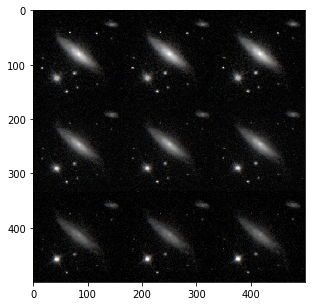

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
plt.imshow(image)

In [4]:
import math

som_dim = 8
neuron_dim = int(image.shape[0] / math.sqrt(2.0) * 2.0)

np_som = np.random.rand(som_dim, som_dim, neuron_dim, neuron_dim).astype(np.float32)
som = pink.SOM(np_som, neuron_layout="cartesian-3d")

trainer = pink.Trainer(som, number_of_rotations=60)

In [5]:
from tqdm import tqdm_notebook

for image in tqdm_notebook(myiter, total=myiter.number_of_images):
    trainer(pink.Data(image))

In [6]:
trainer.update_som()

In [ ]:
np_som = np.array(som, copy=True)

print(np_som)

# plt.figure(figsize=(10,10))
# plt.imshow(np_som.swapaxes(1, 2).reshape((som_dim * neuron_dim, som_dim * neuron_dim)))
# plt.grid(False)